This project demonstrates a machine learning-based solution for predicting financial defaults. Using features like employment status, bank balance, and annual salary, the model identifies the likelihood of default. Multiple algorithms, including Logistic Regression, Decision Trees, and Random Forests, are applied, achieving high accuracy in evaluating customer risk.

Loading Dataset

In [2]:
# Access the uploaded file
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("Default_Fin.csv")

# Display the DataFrame
print(df.head())

   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0


Features and Target Classification

In [3]:

# Define Features and Target Variable
features = ['Employed', 'Bank Balance', 'Annual Salary']
target = 'Defaulted?'

# Extract features (X) and target variable (y)
X = df[features]  # Feature matrix
y = df[target]    # Target variable

# Display Features and Target Variable
print("\nFeatures:")
print(X.head())

print("\nTarget Variable:")
print(y.head())

# Check the data types
print("\nFeature Data Types:")
print(X.dtypes)

print("\nTarget Data Type:")
print(y.dtypes)


Features:
   Employed  Bank Balance  Annual Salary
0         1       8754.36      532339.56
1         0       9806.16      145273.56
2         1      12882.60      381205.68
3         1       6351.00      428453.88
4         1       9427.92      461562.00

Target Variable:
0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64

Feature Data Types:
Employed           int64
Bank Balance     float64
Annual Salary    float64
dtype: object

Target Data Type:
int64


Visualization

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


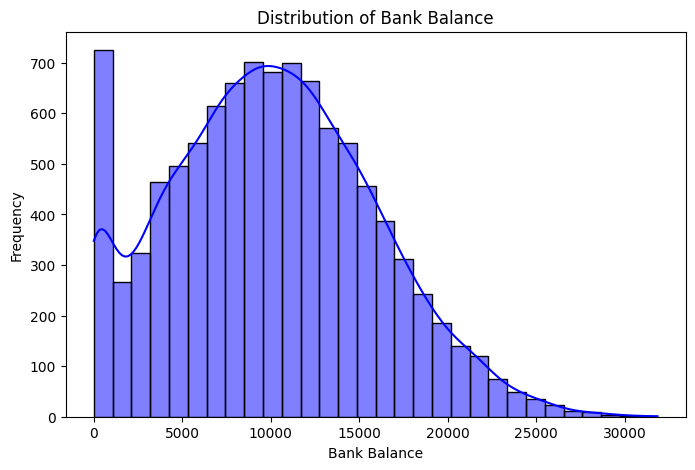

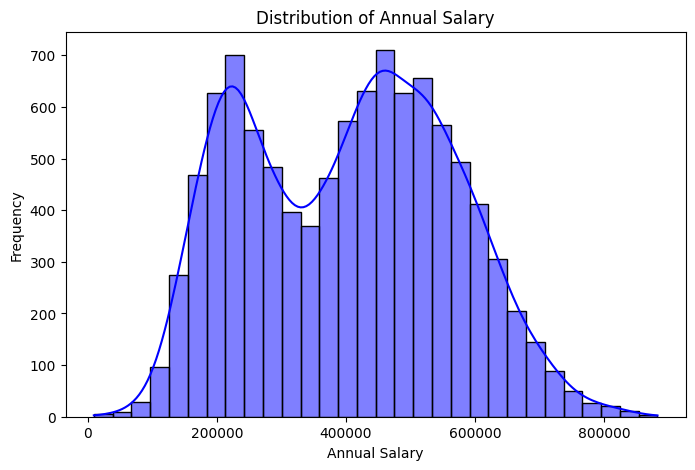

In [5]:

# Visualize the distribution of all numerical columns
numerical_columns = ['Bank Balance', 'Annual Salary']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

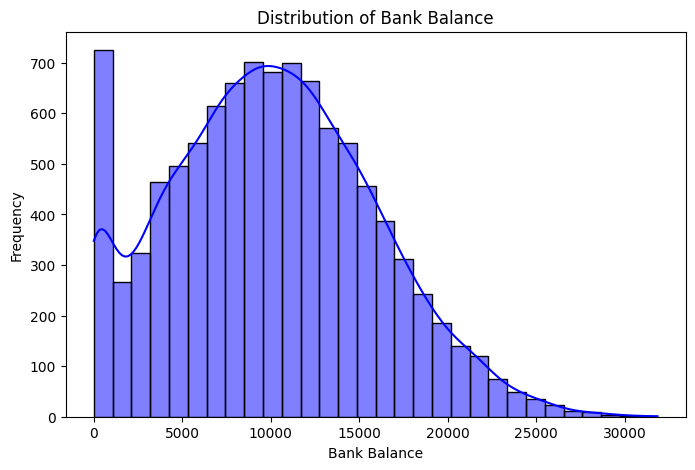

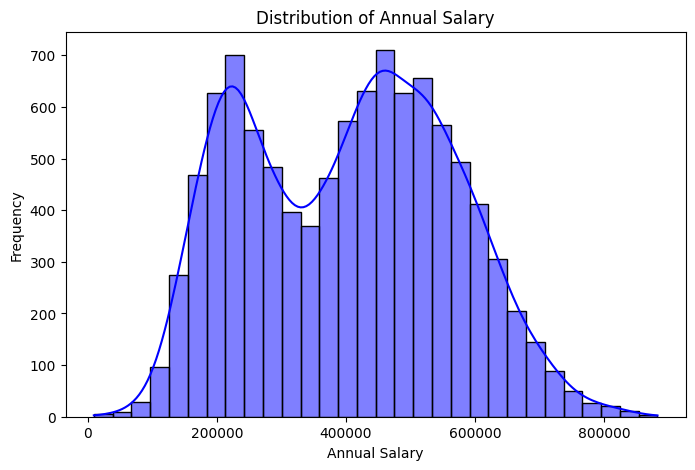

In [6]:

# Visualize the distribution of all numerical columns
numerical_columns = ['Bank Balance', 'Annual Salary']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

<Figure size 600x400 with 0 Axes>

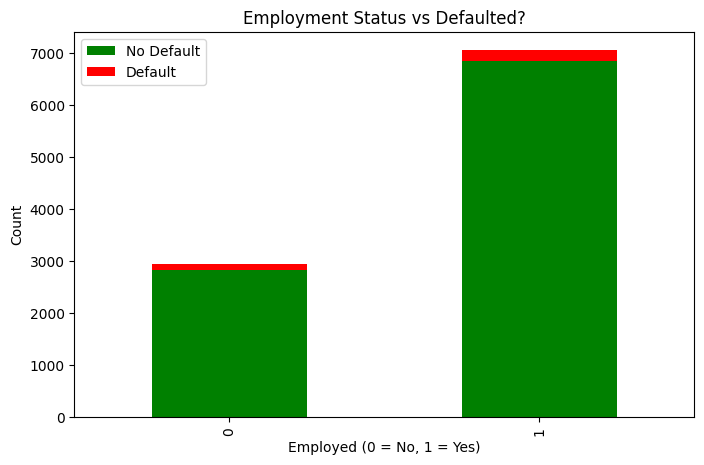

In [7]:

# Visualize the relationship between Employed and Defaulted?
plt.figure(figsize=(6, 4))
employment_defaulted = df.groupby(['Employed', 'Defaulted?']).size().unstack()
employment_defaulted.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 5))
plt.title("Employment Status vs Defaulted?")
plt.xlabel("Employed (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.show()

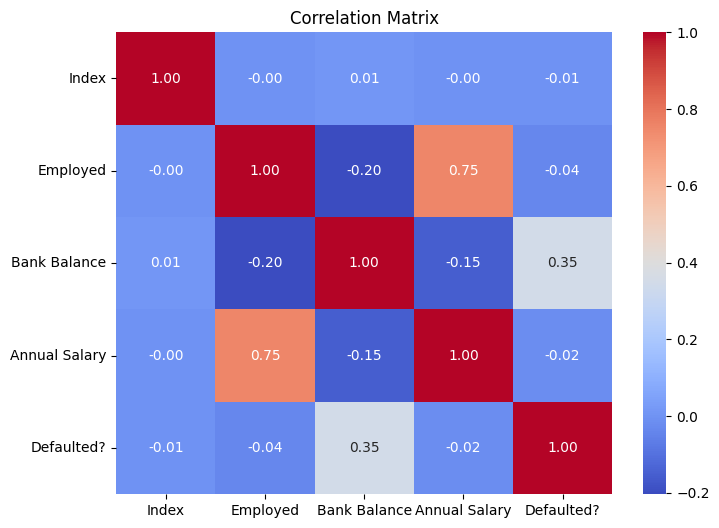

In [8]:
# Calculate correlation between numerical features and target variable
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Normalization & Standardization

Normalized Data (First 5 Rows):
   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1      0.274846       0.598905           0
1      2         0      0.307868       0.155727           0
2      3         1      0.404454       0.425862           0
3      4         1      0.199392       0.479959           0
4      5         1      0.295993       0.517867           0

Standardized Data (First 5 Rows):
   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1     -0.218828       0.813188           0
1      2         0     -0.037617      -1.605496           0
2      3         1      0.492412      -0.131212           0
3      4         1     -0.632894       0.164031           0
4      5         1     -0.102782       0.370915           0


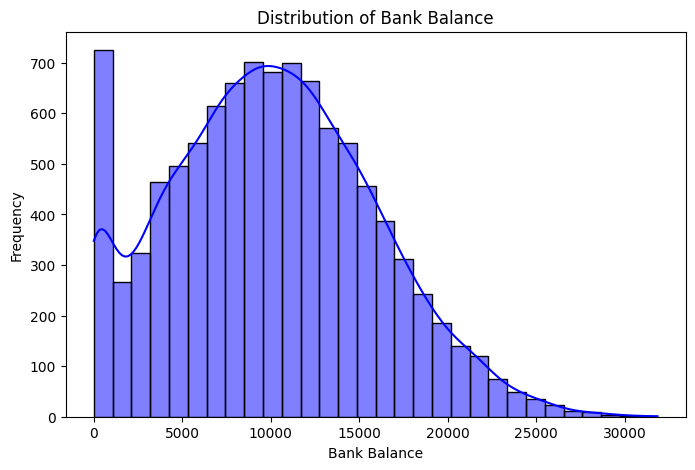

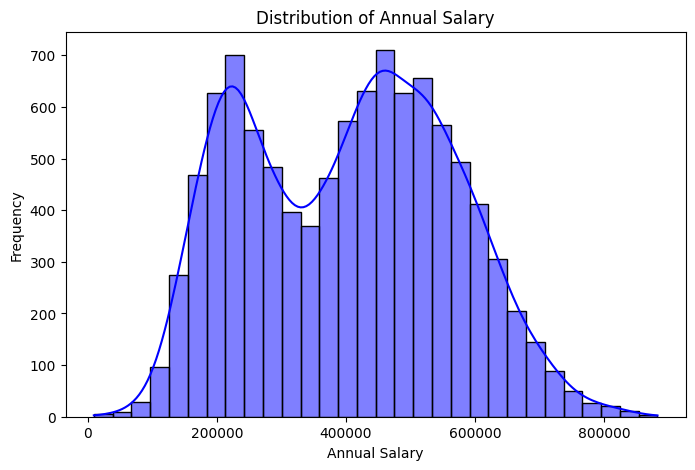

<Figure size 600x400 with 0 Axes>

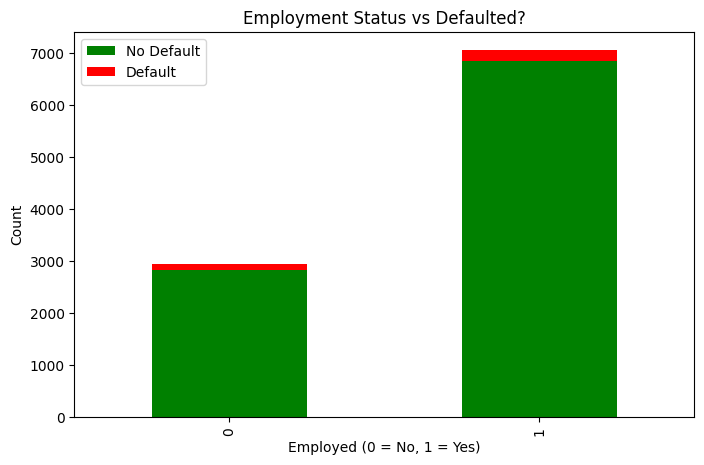

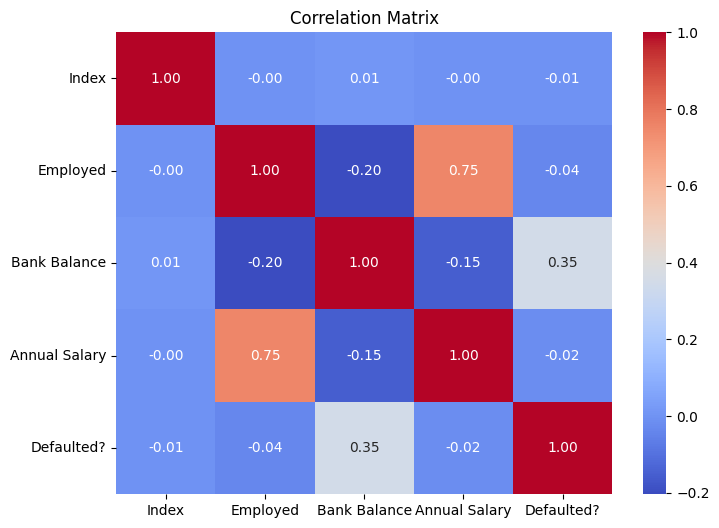

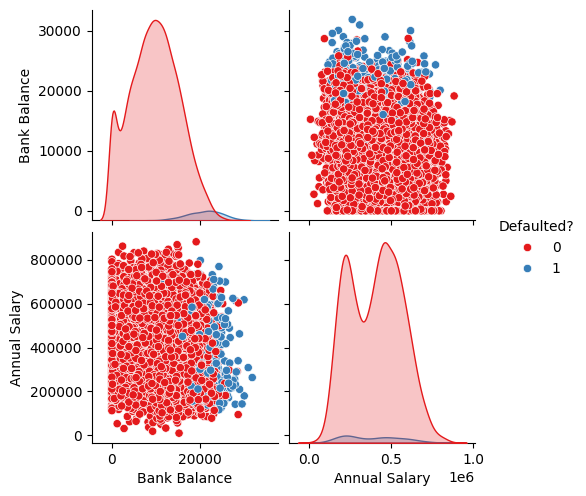

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset (assuming it's preloaded as df)
# Define numerical columns for scaling
numerical_columns = ['Bank Balance', 'Annual Salary']

# Normalize the numerical columns
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])

# Standardize the numerical columns
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler_standard.fit_transform(df[numerical_columns])

# Display first few rows of both normalized and standardized data
print("Normalized Data (First 5 Rows):")
print(df_normalized.head())

print("\nStandardized Data (First 5 Rows):")
print(df_standardized.head())

# Visualize the distribution of all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Visualize the relationship between Employed and Defaulted?
plt.figure(figsize=(6, 4))
employment_defaulted = df.groupby(['Employed', 'Defaulted?']).size().unstack()
employment_defaulted.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 5))
plt.title("Employment Status vs Defaulted?")
plt.xlabel("Employed (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.show()

# Calculate correlation between numerical features and target variable
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize pairwise relationships
sns.pairplot(df, hue='Defaulted?', vars=numerical_columns, palette='Set1')
plt.show()


In [10]:
print(df_standardized)

      Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1     -0.218828       0.813188           0
1         2         0     -0.037617      -1.605496           0
2         3         1      0.492412      -0.131212           0
3         4         1     -0.632894       0.164031           0
4         5         1     -0.102782       0.370915           0
...     ...       ...           ...            ...         ...
9995   9996         1     -0.255979       1.460366           0
9996   9997         1     -0.160050      -1.039014           0
9997   9998         1      0.020747       1.883565           0
9998   9999         1      1.516744       0.236363           0
9999  10000         0     -1.311695      -1.248805           0

[10000 rows x 5 columns]


Train & Test Split

In [12]:
from sklearn.model_selection import train_test_split

print("\nStandardized Data (First 5 Rows):")
print(df_standardized.head())

# Split the data into features (X) and target (y)
X = df_standardized[['Employed', 'Bank Balance', 'Annual Salary']]
y = df_standardized['Defaulted?']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine train and test into separate DataFrames
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Display first few rows of train and test DataFrames
print("\nTrain DataFrame (First 5 Rows):")
print(df_train.head())

print("\nTest DataFrame (First 5 Rows):")
print(df_test.head())


Standardized Data (First 5 Rows):
   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1     -0.218828       0.813188           0
1      2         0     -0.037617      -1.605496           0
2      3         1      0.492412      -0.131212           0
3      4         1     -0.632894       0.164031           0
4      5         1     -0.102782       0.370915           0

Train DataFrame (First 5 Rows):
      Employed  Bank Balance  Annual Salary  Defaulted?
9254         1      0.378744       0.044009           0
1561         1     -1.598552      -0.364145           0
1670         1      0.436984       0.547802           0
6087         1     -0.148101       0.795498           0
6669         0     -0.285564      -0.583839           0

Test DataFrame (First 5 Rows):
      Employed  Bank Balance  Annual Salary  Defaulted?
6252         1      1.241051      -0.150712           0
4684         1     -0.131458       0.646529           0
1731         1     -1.727085      -0

Model Training And Testing

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Logistic Regression

In [16]:
# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.97


Decision Tree

In [17]:
# 2. Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.955


Random Forest Classifier

In [18]:
# 3. Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", random_forest_accuracy)


Random Forest Accuracy: 0.964


Support Vector Classifier

In [19]:
# 4. Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy:", svc_accuracy)

Support Vector Classifier Accuracy: 0.9695


KNN

In [20]:
# 5. K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.964
